In [2]:
import torch
import pandas as pd
from tqdm.notebook import tqdm


In [3]:
df = pd.read_csv("C:/Users/mufdu/Documents/Deep-Learning/SemEval-Task10/data/sexist_data.csv")
df.shape

(6748, 5)

In [4]:
df['text']=df['text'].str.replace('[(#@&!?)]','')

df.head(5)

C:\Users\mufdu\AppData\Local\Temp\ipykernel_32980\862735610.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text']=df['text'].str.replace('[(#@&!?)]','')


,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-10142,"just the inside of your wallet: cash, bank car...",sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...
1,sexism2022_english-760,They get the initial chance because they are a...,sexist,2. derogation,2.1 descriptive attacks
2,sexism2022_english-1108,ugly chicks A pussy is a pussy.,sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...
3,sexism2022_english-10099,fuck her off with a nine mm this is what you g...,sexist,"1. threats, plans to harm and incitement",1.2 incitement and encouragement of harm
4,sexism2022_english-10014,How about I talk shit to an idiot like you Are...,sexist,3. animosity,"3.1 casual use of gendered slurs, profanities,..."


In [5]:
import contractions

for index, row in df.iterrows():
  row['text'] = contractions.fix(row['text'])

In [6]:
df['text'] = df['text'].str.replace(r'[^\w\s]+', '')

df.head(5)

C:\Users\mufdu\AppData\Local\Temp\ipykernel_32980\2779130553.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(r'[^\w\s]+', '')


,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-10142,just the inside of your wallet cash bank cards...,sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...
1,sexism2022_english-760,They get the initial chance because they are a...,sexist,2. derogation,2.1 descriptive attacks
2,sexism2022_english-1108,ugly chicks A pussy is a pussy,sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...
3,sexism2022_english-10099,fuck her off with a nine mm this is what you g...,sexist,"1. threats, plans to harm and incitement",1.2 incitement and encouragement of harm
4,sexism2022_english-10014,How about I talk shit to an idiot like you Are...,sexist,3. animosity,"3.1 casual use of gendered slurs, profanities,..."


In [7]:
df["text"] = df["text"].str.replace("URL","")
df["text"] = df["text"].str.replace("USER","")
df["text"] = df["text"].str.lower()
df.head(5)

,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-10142,just the inside of your wallet cash bank cards...,sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...
1,sexism2022_english-760,they get the initial chance because they are a...,sexist,2. derogation,2.1 descriptive attacks
2,sexism2022_english-1108,ugly chicks a pussy is a pussy,sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...
3,sexism2022_english-10099,fuck her off with a nine mm this is what you g...,sexist,"1. threats, plans to harm and incitement",1.2 incitement and encouragement of harm
4,sexism2022_english-10014,how about i talk shit to an idiot like you are...,sexist,3. animosity,"3.1 casual use of gendered slurs, profanities,..."


In [8]:
df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-10142,just the inside of your wallet cash bank cards...,sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...
1,sexism2022_english-760,they get the initial chance because they are a...,sexist,2. derogation,2.1 descriptive attacks
2,sexism2022_english-1108,ugly chicks a pussy is a pussy,sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...
3,sexism2022_english-10099,fuck her off with a nine mm this is what you g...,sexist,"1. threats, plans to harm and incitement",1.2 incitement and encouragement of harm
4,sexism2022_english-10014,how about i talk shit to an idiot like you are...,sexist,3. animosity,"3.1 casual use of gendered slurs, profanities,..."
...,...,...,...,...,...
6743,sexism2022_english-19317,another democrat with signal glassesthere is n...,sexist,2. derogation,2.1 descriptive attacks
6744,sexism2022_english-15667,that is what we do,sexist,3. animosity,"3.1 casual use of gendered slurs, profanities,..."
6745,sexism2022_english-1400,never forget it is always the mans fault never...,sexist,4. prejudiced discussions,4.2 supporting systemic discrimination against...
6746,sexism2022_english-4515,it is the guys who love these instagram sluts ...,sexist,2. derogation,2.2 aggressive and emotive attacks


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# Encoding categorical data to integer labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label_vector'] = le.fit_transform(df['label_vector'])
print(df['label_vector'])

0        4
1        2
2        4
3        1
4        5
        ..
6743     2
6744     5
6745    10
6746     3
6747     2
Name: label_vector, Length: 6748, dtype: int32


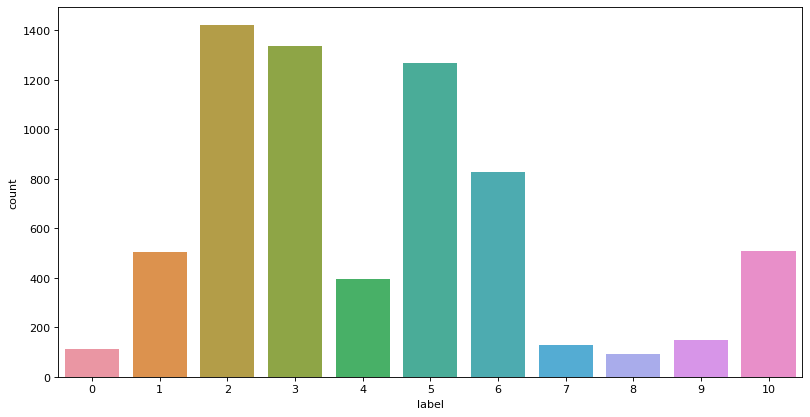

In [11]:
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=80)
sns.countplot(x = df.label_vector)
plt.xlabel('label');


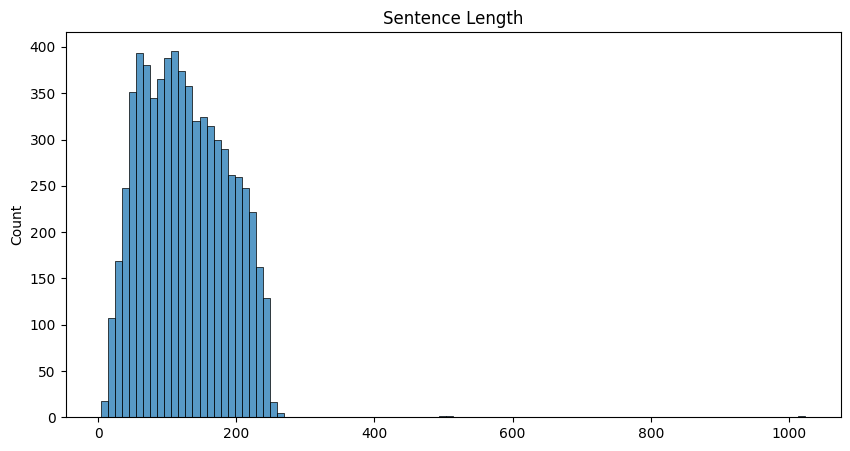

In [12]:
#need equal length sentences
#plot hist of sentence length
plt.figure(figsize=(10, 5))
sns.histplot([len(s) for s in df.text], bins=100)
plt.title('Sentence Length')
plt.show()


In [13]:
#find the maximum length
max_len = max([len(sent) for sent in df.text])
print('Max length: ', max_len)


Max length:  1024


In [14]:
from sklearn.model_selection import train_test_split

#train test split
X_train, X_val, y_train, y_val = train_test_split(df.index.values, 
                                                   df.label_vector.values,
                                                   test_size = 0.15,
                                                   random_state = 17,
                                                   stratify = df.label_vector.values)


In [15]:
#create new column
df['data_type'] = ['not_set'] * df.shape[0]
df.head()


,rewire_id,text,label_sexist,label_category,label_vector,data_type
0,sexism2022_english-10142,just the inside of your wallet cash bank cards...,sexist,2. derogation,4,not_set
1,sexism2022_english-760,they get the initial chance because they are a...,sexist,2. derogation,2,not_set
2,sexism2022_english-1108,ugly chicks a pussy is a pussy,sexist,2. derogation,4,not_set
3,sexism2022_english-10099,fuck her off with a nine mm this is what you g...,sexist,"1. threats, plans to harm and incitement",1,not_set
4,sexism2022_english-10014,how about i talk shit to an idiot like you are...,sexist,3. animosity,5,not_set


In [16]:
#fill in data type
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'


In [17]:
df.head()

,rewire_id,text,label_sexist,label_category,label_vector,data_type
0,sexism2022_english-10142,just the inside of your wallet cash bank cards...,sexist,2. derogation,4,val
1,sexism2022_english-760,they get the initial chance because they are a...,sexist,2. derogation,2,train
2,sexism2022_english-1108,ugly chicks a pussy is a pussy,sexist,2. derogation,4,train
3,sexism2022_english-10099,fuck her off with a nine mm this is what you g...,sexist,"1. threats, plans to harm and incitement",1,train
4,sexism2022_english-10014,how about i talk shit to an idiot like you are...,sexist,3. animosity,5,train


In [18]:
df.groupby(['label_vector', 'data_type']).count()


rewire_id  text  label_sexist  label_category
label_vector data_type                                               
0            train             95    95            95              95
             val               17    17            17              17
1            train            430   430           430             430
             val               76    76            76              76
2            train           1209  1209          1209            1209
             val              214   214           214             214
3            train           1135  1135          1135            1135
             val              201   201           201             201
4            train            336   336           336             336
             val               59    59            59              59
5            train           1078  1078          1078            1078
             val              190   190           190             190
6            train            705   705           705             705
             val              124   124           124             124
7            train            108   108           108             108
             val               19    19            19              19
8            train             79    79            79              79
             val               14    14            14              14
9            train            127   127           127             127
             val               22    22            22              22
10           train            433   433           433             433
             val               77    77            77              77

TOKENIZATION

In [19]:
from transformers import BertTokenizer
from torch.utils.data import TensorDataset


In [20]:
#load tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                         do_lower_case = True)


In [21]:
#tokenize train set
encoded_data_train = tokenizer.batch_encode_plus(df[df.data_type == 'train'].text.values,
                                                add_special_tokens = True,
                                                return_attention_mask = True,
                                                pad_to_max_length = True,
                                                max_length = 250,
                                                return_tensors = 'pt')


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
c:\Users\mufdu\anaconda3\envs\pytorch_env\lib\site-packages\transformers\tokenization_utils_base.py:2336: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [22]:
#tokenizer val set
encoded_data_val = tokenizer.batch_encode_plus(df[df.data_type == 'val'].text.values,
                                                #add_special_tokens = True,
                                                return_attention_mask = True,
                                                pad_to_max_length = True,
                                                max_length = 250,
                                                return_tensors = 'pt')


In [23]:
encoded_data_train


{'input_ids': tensor([[  101,  2027,  2131,  ...,     0,     0,     0],
        [  101,  9200, 20649,  ...,     0,     0,     0],
        [  101,  6616,  2014,  ...,     0,     0,     0],
        ...,
        [  101,  2196,  5293,  ...,     0,     0,     0],
        [  101,  2009,  2003,  ...,     0,     0,     0],
        [  101, 15420,  2066,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [24]:
# le.get_params()
keys = le.classes_
values = le.transform(le.classes_)
dictionary = dict(zip(keys, values))
print(dictionary)

{'1.1 threats of harm': 0, '1.2 incitement and encouragement of harm': 1, '2.1 descriptive attacks': 2, '2.2 aggressive and emotive attacks': 3, '2.3 dehumanising attacks & overt sexual objectification': 4, '3.1 casual use of gendered slurs, profanities, and insults': 5, '3.2 immutable gender differences and gender stereotypes': 6, '3.3 backhanded gendered compliments': 7, '3.4 condescending explanations or unwelcome advice': 8, '4.1 supporting mistreatment of individual women': 9, '4.2 supporting systemic discrimination against women as a group': 10}


ENCODING

In [25]:
#encode train set
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type == 'train'].label_vector.values)


In [26]:
#encode val set
input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']

#convert data type to torch.tensor
labels_val = torch.tensor(df[df.data_type == 'val'].label_vector.values)


In [27]:
input_ids_train


tensor([[  101,  2027,  2131,  ...,     0,     0,     0],
        [  101,  9200, 20649,  ...,     0,     0,     0],
        [  101,  6616,  2014,  ...,     0,     0,     0],
        ...,
        [  101,  2196,  5293,  ...,     0,     0,     0],
        [  101,  2009,  2003,  ...,     0,     0,     0],
        [  101, 15420,  2066,  ...,     0,     0,     0]])

In [28]:
attention_masks_train


tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])

In [29]:
labels_train


tensor([ 2,  4,  1,  ..., 10,  3,  2], dtype=torch.int32)

In [30]:
#create dataloader
dataset_train = TensorDataset(input_ids_train, 
                              attention_masks_train,
                              labels_train)

dataset_val = TensorDataset(input_ids_val, 
                             attention_masks_val, 
                             labels_val)

In [31]:
print(len(dataset_train))
print(len(dataset_val))


5735
1013


In [32]:
dataset_train


In [33]:
dataset_train.tensors


(tensor([[  101,  2027,  2131,  ...,     0,     0,     0],
         [  101,  9200, 20649,  ...,     0,     0,     0],
         [  101,  6616,  2014,  ...,     0,     0,     0],
         ...,
         [  101,  2196,  5293,  ...,     0,     0,     0],
         [  101,  2009,  2003,  ...,     0,     0,     0],
         [  101, 15420,  2066,  ...,     0,     0,     0]]),
 tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]]),
 tensor([ 2,  4,  1,  ..., 10,  3,  2], dtype=torch.int32))


SET UP BERT PRETRAINED MODEL
```
# This is formatted as code
```



In [34]:
label_dict = {'1.1 threats of harm': 0, '1.2 incitement and encouragement of harm': 1, '2.1 descriptive attacks': 2, '2.2 aggressive and emotive attacks': 3,
              '2.3 dehumanising attacks & overt sexual objectification': 4, '3.1 casual use of gendered slurs, profanities, and insults': 5,
              '3.2 immutable gender differences and gender stereotypes': 6, '3.3 backhanded gendered compliments': 7, 
              '3.4 condescending explanations or unwelcome advice': 8, '4.1 supporting mistreatment of individual women': 9, 
              '4.2 supporting systemic discrimination against women as a group': 10}

In [35]:
from transformers import BertForSequenceClassification

#load pre-trained BERT
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',
                                                      num_labels = len(label_dict),
                                                      output_attentions = False,
                                                      output_hidden_states = False)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [36]:
#model summary
model.config


BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9",
    "10": "LABEL_10"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_10": 10,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5,
    "LABEL_6": 6,
    "LABEL_7": 7,
    "LABEL_8": 8,
    "LABEL_9": 9
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolut

Create Data Loaders

In [37]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 4 #since we have limited resource

#load train set
dataloader_train = DataLoader(dataset_train,
                              sampler = RandomSampler(dataset_train),
                              batch_size = batch_size)

#load val set
dataloader_val = DataLoader(dataset_val,
                              sampler = RandomSampler(dataset_val),
                              batch_size = 32) #since we don't have to do backpropagation for this step

Set Up Optimizer and Scheduler


In [38]:
from transformers import AdamW, get_linear_schedule_with_warmup
epochs = 10

#load optimizer
optimizer = AdamW(model.parameters(),
                 lr = 1e-5,
                 eps = 1e-8) #2e-5 > 5e-5



c:\Users\mufdu\anaconda3\envs\pytorch_env\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [39]:
#load scheduler
scheduler = get_linear_schedule_with_warmup(optimizer,
                                           num_warmup_steps = 0,
                                           num_training_steps = len(dataloader_train)*epochs)

Define Performance Metrics


In [40]:
import numpy as np
from sklearn.metrics import f1_score

#f1 score
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average = 'weighted')


In [41]:
#accuracy score
def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    #make prediction
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    
    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy:{len(y_preds[y_preds==label])}/{len(y_true)}\n')


In [42]:
def evaluate(dataloader_val):

    #evaluation mode disables the dropout layer 
    model.eval()
    
    #tracking variables
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in tqdm(dataloader_val):
        
        #load into GPU
        batch = tuple(b.to(device) for b in batch)
        
        #define inputs
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2].type(torch.LongTensor).to(device)}

        #compute logits
        with torch.no_grad():        
            outputs = model(**inputs)
        
        #compute loss
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        #compute accuracy
        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    #compute average loss
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

TRAIN MODEL

In [43]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)



In [44]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(device)

cuda


In [45]:
for epoch in tqdm(range(1, epochs+1)):

    #set model in train mode
    model.train()

    #tracking variable
    loss_train_total = 0
    
    #set up progress bar
    progress_bar = tqdm(dataloader_train, 
                        desc='Epoch {:1d}'.format(epoch), 
                        leave=False, 
                        disable=False)
    
    for batch in progress_bar:
        #set gradient to 0
        model.zero_grad()

        #load into GPU
        batch = tuple(b.to(device) for b in batch)

        #define inputs
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2].type(torch.LongTensor).to(device)}
        
        outputs = model(**inputs)
        loss = outputs[0] #output.loss
        loss_train_total +=loss.item()

        #backward pass to get gradients
        loss.backward()
        
        #clip the norm of the gradients to 1.0 to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        
        #update optimizer
        optimizer.step()

        #update scheduler
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})     
    
    tqdm.write('\nEpoch {epoch}')
    
    #print training result
    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    #evaluate
    val_loss, predictions, true_vals = evaluate(dataloader_val)
    #f1 score
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (weighted): {val_f1}')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/1434 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 1.742614369886191


  0%|          | 0/32 [00:00<?, ?it/s]

Validation loss: 1.4899409227073193
F1 Score (weighted): 0.44776684071569683


Epoch 2:   0%|          | 0/1434 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 1.2201715279448482


  0%|          | 0/32 [00:00<?, ?it/s]

Validation loss: 1.2844898700714111
F1 Score (weighted): 0.5550448098926931


Epoch 3:   0%|          | 0/1434 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.7586993043320033


  0%|          | 0/32 [00:00<?, ?it/s]

Validation loss: 1.172579351812601
F1 Score (weighted): 0.6268783585065902


Epoch 4:   0%|          | 0/1434 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.4400146008843252


  0%|          | 0/32 [00:00<?, ?it/s]

Validation loss: 1.250341285020113
F1 Score (weighted): 0.6830880964064863


Epoch 5:   0%|          | 0/1434 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.26402836101562516


  0%|          | 0/32 [00:00<?, ?it/s]

Validation loss: 1.4488823935389519
F1 Score (weighted): 0.7063209143820456


Epoch 6:   0%|          | 0/1434 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.15404231207757166


  0%|          | 0/32 [00:00<?, ?it/s]

Validation loss: 1.3127518631517887
F1 Score (weighted): 0.7502246486952642


Epoch 7:   0%|          | 0/1434 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.1018869049496094


  0%|          | 0/32 [00:00<?, ?it/s]

Validation loss: 1.4796631410717964
F1 Score (weighted): 0.75656615336895


Epoch 8:   0%|          | 0/1434 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.06291876450663067


  0%|          | 0/32 [00:00<?, ?it/s]

Validation loss: 1.4231993034482002
F1 Score (weighted): 0.7709990309217543


Epoch 9:   0%|          | 0/1434 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.044400391081925915


  0%|          | 0/32 [00:00<?, ?it/s]

Validation loss: 1.4128068946301937
F1 Score (weighted): 0.7763874066040398


Epoch 10:   0%|          | 0/1434 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.03312248352267742


  0%|          | 0/32 [00:00<?, ?it/s]

Validation loss: 1.3977545499801636
F1 Score (weighted): 0.7764038836202996


Model Evaluation


In [46]:
outputs.loss


tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)

In [47]:
outputs.logits


tensor([[-1.8490, -1.6153,  8.6172,  1.6773, -1.0602, -2.8053, -1.4900,  0.2442,
         -0.9266, -0.3344, -1.2480],
        [-1.3827, -0.4018, -0.4921, -0.8222,  1.5109,  9.5608, -1.2505, -2.5247,
         -1.4890, -1.0879, -0.6249],
        [-0.0825, -0.9553, -0.6222,  9.7390, -1.5382, -1.5248, -1.9473, -0.5733,
         -1.4046, -0.7034, -0.7649]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [48]:
#save model
model.to(device)
pass


In [49]:
#evaluate
_, predictions, true_vals = evaluate(dataloader_val)

  0%|          | 0/32 [00:00<?, ?it/s]

In [50]:
#get accuracy score
accuracy_per_class(predictions, true_vals)

Class: 1.1 threats of harm
Accuracy:11/17

Class: 1.2 incitement and encouragement of harm
Accuracy:55/76

Class: 2.1 descriptive attacks
Accuracy:168/214

Class: 2.2 aggressive and emotive attacks
Accuracy:167/201

Class: 2.3 dehumanising attacks & overt sexual objectification
Accuracy:45/59

Class: 3.1 casual use of gendered slurs, profanities, and insults
Accuracy:155/190

Class: 3.2 immutable gender differences and gender stereotypes
Accuracy:90/124

Class: 3.3 backhanded gendered compliments
Accuracy:16/19

Class: 3.4 condescending explanations or unwelcome advice
Accuracy:8/14

Class: 4.1 supporting mistreatment of individual women
Accuracy:19/22

Class: 4.2 supporting systemic discrimination against women as a group
Accuracy:53/77



In [51]:
predictions

array([[-1.142865  , -1.0304039 , -1.7520123 , ...,  1.2681284 ,
        -2.4569147 , -1.2018452 ],
       [-1.7159674 , -1.7274344 ,  2.1893663 , ..., -0.7344112 ,
        -1.0969267 ,  4.959165  ],
       [-0.9866278 , -1.4963913 , -1.1144869 , ..., -1.300289  ,
        -1.1288965 , -0.8183953 ],
       ...,
       [-0.81365246, -0.95644236, -0.8088077 , ..., -1.502235  ,
        -1.435401  , -0.67132264],
       [ 0.03517506,  0.13734   ,  3.673011  , ..., -1.380333  ,
         4.0496106 , -1.375988  ],
       [-1.0219443 , -1.166727  , -1.4749004 , ...,  1.810595  ,
        -2.311399  , -1.0462886 ]], dtype=float32)

In [52]:
true_vals

array([4, 2, 3, ..., 3, 4, 6], dtype=int64)

In [53]:
preds_flat = np.argmax(predictions, axis=1).flatten()
labels_flat = true_vals.flatten()

print(preds_flat)
print(labels_flat)

[6 3 3 ... 3 9 6]
[4 2 3 ... 3 4 6]


In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import f1_score

In [55]:
accuracy = accuracy_score(y_true = labels_flat, y_pred = preds_flat )
f1 = f1_score(y_true = labels_flat, y_pred = preds_flat, average = 'weighted')
print(f"The accuracy from sentiment classification: {accuracy}")
print(f"with f1 score: {f1}")
print(classification_report(y_true = labels_flat, y_pred = preds_flat ))

The accuracy from sentiment classification: 0.7769002961500494
with f1 score: 0.7764038836202996
              precision    recall  f1-score   support

           0       0.79      0.65      0.71        17
           1       0.85      0.72      0.78        76
           2       0.74      0.79      0.76       214
           3       0.73      0.83      0.77       201
           4       0.79      0.76      0.78        59
           5       0.82      0.82      0.82       190
           6       0.82      0.73      0.77       124
           7       0.80      0.84      0.82        19
           8       0.80      0.57      0.67        14
           9       0.76      0.86      0.81        22
          10       0.79      0.69      0.74        77

    accuracy                           0.78      1013
   macro avg       0.79      0.75      0.77      1013
weighted avg       0.78      0.78      0.78      1013



Text(0.5, 1.0, 'Sentiment classification')

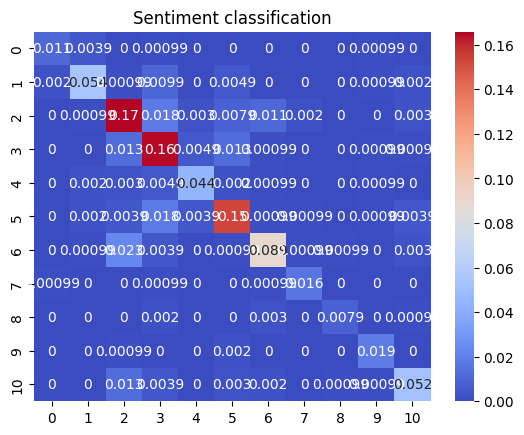

In [56]:
sns.heatmap(confusion_matrix(y_true= labels_flat, y_pred = preds_flat) / len(preds_flat), 
            annot = True, cmap ='coolwarm')
plt.title('Sentiment classification')

In [57]:
torch.save(model, "C:/Users/mufdu/Documents/Deep-Learning/SemEval-Task10/Bert-based-uncased/model_C")

In [58]:
# load the model from disk
# loaded_model = joblib.load(filename)
# result = loaded_model.score(X_test, Y_test)